In [613]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Predicting Heart Disease With Various Machine Learning Models

As the title suggests, the purpose of this notebook is to predict heart disease with various machine learning models. At the end of this notebook, a comparison is made between the different models to determine which method is best for this specific problem and dataset. 

The algorithms used in this notebook are the following: 
- Logistic Regression
- K-Nearest Neighbors
- Decision Tree (Classification Tree)
- Random Forest
- Support Vector Machines

The dataset used in this notebook is the `Heart Disease` dataset from the [`UCI Machine Learning Repository`](https://archive.ics.uci.edu/dataset/45/heart+disease). Specifically, the `processed.cleveland.data` dataset is used in this notebook.

## 1. Exploring the dataset

In this next cell, the dataset is imported into the notebook as a DataFrame and the column names are set according to the UCI documentation.

In [573]:
df = pd.read_csv('processed.cleveland.data')
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [574]:
df.shape

(302, 14)

In [650]:
round(df.describe(), 2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00
mean,54.41,0.68,3.17,131.65,246.74,0.15,0.99,149.61,0.33,1.04,1.60,0.46
std,9.04,0.47,0.95,17.61,51.86,0.35,0.99,22.91,0.47,1.16,0.61,0.50
min,29.00,0.00,1.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,1.00,0.00
25%,48.00,0.00,3.00,120.00,211.00,0.00,0.00,133.25,0.00,0.00,1.00,0.00
50%,55.50,1.00,3.00,130.00,241.50,0.00,0.50,153.00,0.00,0.80,2.00,0.00
75%,61.00,1.00,4.00,140.00,275.00,0.00,2.00,166.00,1.00,1.60,2.00,1.00
max,77.00,1.00,4.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,3.00,1.00


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>],
       [<Axes: title={'center': 'trestbps'}>,
        <Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>],
       [<Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>,
        <Axes: title={'center': 'exang'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

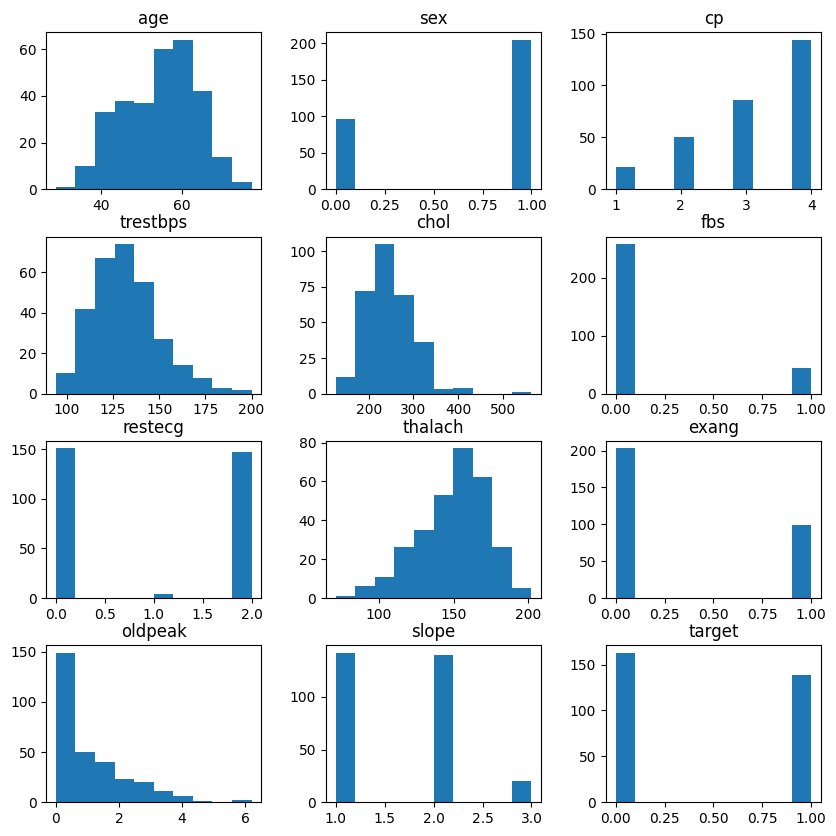

In [646]:
df.hist(grid=False, figsize=(10, 10))

The above histograms show that not all features share the same distribution, so standardizing will definitely be useful. The categorical features are also clearly visible.

Here is a description of each feature (column) according to the UCI documentation:

* age: int
* sex: category
    * 0 = Female
    * 1 = Male
* cp: category (chest pain)
    * 1 = Typical angina
    * 2 = Atypical angina
    * 3 = Non-anginal pain
    * 4 = Asymptomatic
* trestbps: int (resting blood pressure in mmHg)
* chol: int (serum cholesterol in mg/dl)
* fbs: category (fasting blood sugar > 120mg/dl)
    * 0 = False
    * 1 = True
* restecg: category (resting electrocardiographic results)
    * 0 = Normal
    * 1 = Having ST-T wave abnormality
    * 2 = Showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: int (maximum heart rate achieved)
* exang: category (exercise induced angina)
    * 0 = No
    * 1 = Yes
* oldpeak: int (ST depression induced by exercise relative to rest)
* slope: category (the slope of the peak exercise ST segment)
    * 1 = Upsloping
    * 2 = Flat
    * 3 = Downsloping
* ca: int (number of major vessels [0-3] colored by flouroscopy)
* thal: category (not sure...)
    * 3 = Normal
    * 6 = Fixed defect
    * 7 = Reversable defect
* target: category (has heart disease)
    * 0 = No
    * 1 = Yes

The `target` column still needs to be changed. All 2's, 3's and 4's will be replaced with 1's. This simplifies the problem to binary classification, there also seems to be no documentation within UCI that explains the values outside of 1 and 0. The next step will modify the `target` column.

In [577]:
df['target'].unique()

array([2, 1, 0, 3, 4])

In [578]:
df.loc[(df['target'] == 2), 'target'] = 1
df.loc[(df['target'] == 3), 'target'] = 1
df.loc[(df['target'] == 4), 'target'] = 1
df['target'].unique()

array([1, 0])

Text(0.5, 1.0, 'Count of each Target Class')

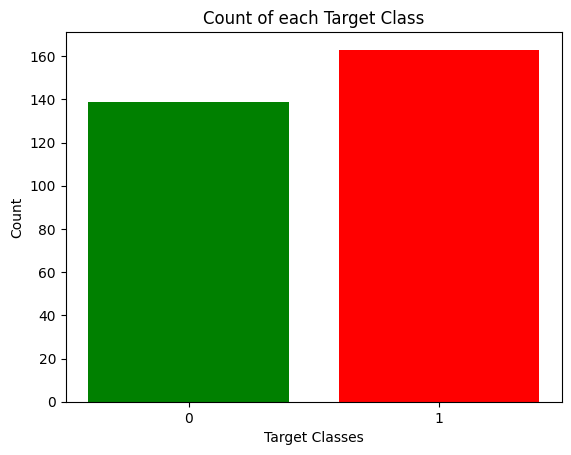

In [579]:
plt.bar(df['target'].unique(), df['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

While the target classes not exactly equally divided, it is still close enough to proceed without dropping or increasing our data.

## 2. Data Preprocessing

First of all, the dataset is checked for missing values.

In [580]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    float64
 1   sex       302 non-null    float64
 2   cp        302 non-null    float64
 3   trestbps  302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    float64
 6   restecg   302 non-null    float64
 7   thalach   302 non-null    float64
 8   exang     302 non-null    float64
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    float64
 11  ca        302 non-null    object 
 12  thal      302 non-null    object 
 13  target    302 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


The `ca` and `thal` column are of type `object`, this suggests that there are missing values in these columns. We will check for missing values and deal with them accordingly.

In [581]:
df['ca'].unique()

array(['3.0', '2.0', '0.0', '1.0', '?'], dtype=object)

In [582]:
df['thal'].unique()

array(['3.0', '7.0', '6.0', '?'], dtype=object)

In [583]:
len(df[(df['thal'] == '?') | (df['ca'] == '?')])

6

The original dataset has 302 samples (rows). Removing the 6 samples with missing values leaves us with 296 samples, which is still plenty to do our analysis.

In [584]:
df_nomissing = df[(df['thal'] != '?') & (df['ca'] != '?')]

In [585]:
df_nomissing['ca'].unique()

array(['3.0', '2.0', '0.0', '1.0'], dtype=object)

In [586]:
df_nomissing['thal'].unique()

array(['3.0', '7.0', '6.0'], dtype=object)

In [587]:
df_nomissing.shape

(296, 14)

Before this data can be used to make predictions on, it needs to be preprocessed. Specifically, One-Hot Encoding will be performed on the non-binary categorical features. Afterward the data wil be scaled. For One-Hot Encoding, `get_dummies()` from Pandas will be used. For scaling, `StandardScaler()` from scikit-learn will be used. Before scaling, the dataset will be split into dependent and independent variables and split into training and testing sets to avoid data leakage.

In [647]:
# One-Hot Encoding
columns_to_encode = ['cp', 'restecg', 'slope', 'thal']
df_nomissing_encoded = pd.get_dummies(df_nomissing, columns=columns_to_encode, dtype=int)
df_nomissing_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,1,...,1,0,0,1,0,1,0,1,0,0
1,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1,...,1,0,0,1,0,1,0,0,0,1
2,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
3,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0
4,56.0,1.0,120.0,236.0,0.0,178.0,0.0,0.8,0.0,0,...,0,1,0,0,1,0,0,1,0,0


In [589]:
df_nomissing_encoded.shape

(296, 23)

In [590]:
# Splitting data into dependent and independent variables
X = df_nomissing_encoded.drop('target', axis=1)
y = df_nomissing_encoded['target']

In [591]:
X.head(5)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
1,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
2,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
3,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0
4,56.0,1.0,120.0,236.0,0.0,178.0,0.0,0.8,0.0,0,...,0,1,0,0,1,0,0,1,0,0


In [592]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: target, dtype: int64

In [593]:
# Creating training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"X_train shape: {X_train.shape}\nX_test shape: {X_test.shape}\ny_train shape: {y_train.shape}\ny_test shape: {y_test.shape}")

X_train shape: (222, 22)
X_test shape: (74, 22)
y_train shape: (222,)
y_test shape: (74,)


In [594]:
# Standardizing the data
scaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [648]:
round(X_train.describe(), 2)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_1.0,cp_2.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
count,222.00,222.00,222.00,222.00,222.00,222.00,222.00,222.00,222.00,222.00,...,222.00,222.00,222.00,222.00,222.00,222.00,222.00,222.00,222.00,222.00
mean,-0.00,0.69,-0.00,-0.00,0.13,-0.00,0.33,0.00,0.08,0.18,...,0.49,0.51,0.01,0.48,0.46,0.47,0.07,0.55,0.06,0.39
std,1.00,0.46,1.00,1.00,0.34,1.00,0.47,1.00,0.27,0.38,...,0.50,0.50,0.12,0.50,0.50,0.50,0.25,0.50,0.24,0.49
min,-2.77,0.00,-2.08,-2.35,0.00,-3.29,0.00,-0.89,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.74,0.00,-0.63,-0.66,0.00,-0.69,0.00,-0.89,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.17,1.00,-0.07,-0.08,0.00,0.16,0.00,-0.22,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
75%,0.75,1.00,0.48,0.57,0.00,0.68,1.00,0.46,0.00,0.00,...,1.00,1.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00
max,2.36,1.00,3.38,6.26,1.00,2.30,1.00,4.34,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [649]:
round(X_test.describe(), 2)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_1.0,cp_2.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
count,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,...,74.00,74.00,74.00,74.00,74.0,74.00,74.00,74.00,74.00,74.00
mean,-0.18,0.62,0.07,0.14,0.18,0.25,0.32,-0.02,0.05,0.14,...,0.45,0.46,0.01,0.53,0.5,0.43,0.07,0.55,0.05,0.39
std,0.84,0.49,0.96,1.09,0.38,0.90,0.47,0.93,0.23,0.34,...,0.50,0.50,0.12,0.50,0.5,0.50,0.25,0.50,0.23,0.49
min,-1.70,0.00,-2.08,-1.90,0.00,-2.27,0.00,-0.89,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
25%,-0.82,0.00,-0.60,-0.68,0.00,-0.29,0.00,-0.89,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
50%,-0.10,1.00,-0.07,-0.04,0.00,0.40,0.00,-0.22,0.00,0.00,...,0.00,0.00,0.00,1.00,0.5,0.00,0.00,1.00,0.00,0.00
75%,0.41,1.00,0.48,0.80,0.00,0.95,1.00,0.58,0.00,0.00,...,1.00,1.00,0.00,1.00,1.0,1.00,0.00,1.00,0.00,1.00
max,1.61,1.00,3.83,3.21,1.00,1.96,1.00,2.48,1.00,1.00,...,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00


In [597]:
print(X_test.columns == X_train.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]


In [598]:
X_train.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'cp_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'restecg_0.0',
       'restecg_1.0', 'restecg_2.0', 'slope_1.0', 'slope_2.0', 'slope_3.0',
       'thal_3.0', 'thal_6.0', 'thal_7.0'],
      dtype='object')

Now the data is ready to be used with Machine Learning Algorithms.

## 3. Training And Testing Different Algorithms

### 3.1. Logistic Regression

In [599]:
logreg_params = {
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear', 'newton-cholesky', 'sag'],
    'max_iter': [650, 700, 800, 900, 1000],
}

logreg_clf = LogisticRegression()

logreg_cv = GridSearchCV(estimator=logreg_clf, param_grid=logreg_params, cv=10, n_jobs=-1, verbose=1)
logreg_cv.fit(X_train, y_train)

logreg_optimal_params = logreg_cv.best_params_
logreg_best_score = logreg_cv.best_score_

print(f"[Logistic Regression] Optimal parameters during CV on training set: {logreg_optimal_params}")
print(f"[Logistic Regression] Best score during CV on training set: {logreg_best_score}")

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[Logistic Regression] Optimal parameters during CV on training set: {'C': 0.1, 'max_iter': 650, 'penalty': 'l2', 'solver': 'lbfgs'}
[Logistic Regression] Best score during CV on training set: 0.8205533596837945


In [600]:
logreg_test_scores = []

for i in range(100):    
    logreg_clf_optimized = LogisticRegression(**logreg_optimal_params)
    logreg_clf_optimized.fit(X_train, y_train)
    logreg_test_scores.append(logreg_clf_optimized.score(X_test, y_test))

logreg_avg_test_score = np.mean(logreg_test_scores)
logreg_avg_test_score

0.9324324324324322

In [601]:
# Summary for Logistic Regression model
print("--------------- Logistic Regression --------------\n")
print(f"Results after 10-fold Cross-Validation:\nBest Parameters (CV): {logreg_optimal_params}\nBest score (CV): {logreg_best_score}\n")
print(f"Score on testing dataset: {logreg_avg_test_score}\n")
print(f"Score on testing dataset (%): {round(logreg_avg_test_score*100, 2)}%\n")
print("-------------------------------------------------")

--------------- Logistic Regression --------------

Results after 10-fold Cross-Validation:
Best Parameters (CV): {'C': 0.1, 'max_iter': 650, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score (CV): 0.8205533596837945

Score on testing dataset: 0.9324324324324322

Score on testing dataset (%): 93.24%

-------------------------------------------------


### 3.2. K-Nearest Neighbors

In [602]:
knn_params = {
    'n_neighbors': [2, 5, 10, 20],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [2, 5, 10, 20, 30, 40, 50],
    'p': [1, 2],
}

knn_clf = KNeighborsClassifier()

knn_cv = GridSearchCV(estimator=knn_clf, param_grid=knn_params, cv=10, n_jobs=-1, verbose=1)

knn_cv.fit(X_train, y_train)

# get the optimal parameters and best score
knn_optimal_params = knn_cv.best_params_
knn_best_score = knn_cv.best_score_

print("[K-Nearest Neighbor] Best Parameters during CV on the training set:", knn_optimal_params)
print("[K-Nearest Neighbor] Best Score during CV on the training set:", knn_best_score)

Fitting 10 folds for each of 168 candidates, totalling 1680 fits
[K-Nearest Neighbor] Best Parameters during CV on the training set: {'algorithm': 'ball_tree', 'leaf_size': 2, 'n_neighbors': 20, 'p': 1}
[K-Nearest Neighbor] Best Score during CV on the training set: 0.8025691699604742


In [603]:
knn_test_scores = []

for i in range(100):
    knn_clf_optimized = KNeighborsClassifier(**knn_optimal_params)
    knn_clf_optimized.fit(X_train, y_train)
    knn_test_scores.append(knn_clf_optimized.score(X_test, y_test))
    
knn_avg_test_score = np.mean(knn_test_scores)
knn_avg_test_score

0.8648648648648651

In [604]:
# Summary for K-Nearest Neighbor model
print("--------------- K-Nearest Neighbor --------------\n")
print(f"Results after 10-fold Cross-Validation:\nBest Parameters (CV): {knn_optimal_params}\nBest score (CV): {knn_best_score}\n")
print(f"Score on testing dataset: {knn_avg_test_score}\n")
print(f"Score on testing dataset (%): {round(knn_avg_test_score*100, 2)}%\n")
print("-------------------------------------------------")

--------------- K-Nearest Neighbor --------------

Results after 10-fold Cross-Validation:
Best Parameters (CV): {'algorithm': 'ball_tree', 'leaf_size': 2, 'n_neighbors': 20, 'p': 1}
Best score (CV): 0.8025691699604742

Score on testing dataset: 0.8648648648648651

Score on testing dataset (%): 86.49%

-------------------------------------------------


### 3.3. Decision Tree (Classification Tree)

In [605]:
dt_params = {
    'criterion': ["log_loss"],
    'max_depth': [1, 10, 20, 30, 50],
    'min_samples_split': [2, 4, 6, 8, 10],
    'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'ccp_alpha': [0, 0.001, 0.01, 0.1, 1, 10],
}

dt_clf = DecisionTreeClassifier()

dt_cv = GridSearchCV(estimator=dt_clf, param_grid=dt_params , cv=10, n_jobs=-1, verbose=1)

dt_cv.fit(X_train, y_train)

# get the optimal parameters and best score
dt_optimal_params = dt_cv.best_params_
dt_best_score = dt_cv.best_score_

print("[Decision Tree / Classification Tree] Best Parameters during CV on the training set:", dt_optimal_params)
print("[Decision Tree / Classification Tree] Best Score during CV on the training set:", dt_best_score)

Fitting 10 folds for each of 1500 candidates, totalling 15000 fits
[Decision Tree / Classification Tree] Best Parameters during CV on the training set: {'ccp_alpha': 0, 'criterion': 'log_loss', 'max_depth': 10, 'max_features': 0.7, 'min_samples_split': 4}
[Decision Tree / Classification Tree] Best Score during CV on the training set: 0.8106719367588934


In [606]:
dt_test_scores = []

for i in range(100):
    dt_clf_optimized = DecisionTreeClassifier(**dt_optimal_params)
    dt_clf_optimized.fit(X_train, y_train)
    dt_test_scores.append(dt_clf_optimized.score(X_test, y_test))

dt_avg_test_score = np.mean(dt_test_scores)
dt_avg_test_score

0.7859459459459458

In [607]:
# Summary for Decision Tree / Classification Tree model
print("--------------- Decision Tree / Classification Tree --------------\n")
print(f"Results after 10-fold Cross-Validation:\nBest Parameters (CV): {dt_optimal_params}\nBest score (CV): {dt_best_score}\n")
print(f"Score on testing dataset: {dt_avg_test_score}\n")
print(f"Score on testing dataset (%): {round(dt_avg_test_score*100, 2)}%\n")
print("-------------------------------------------------")

--------------- Decision Tree / Classification Tree --------------

Results after 10-fold Cross-Validation:
Best Parameters (CV): {'ccp_alpha': 0, 'criterion': 'log_loss', 'max_depth': 10, 'max_features': 0.7, 'min_samples_split': 4}
Best score (CV): 0.8106719367588934

Score on testing dataset: 0.7859459459459458

Score on testing dataset (%): 78.59%

-------------------------------------------------


### 3.4. Random Forest

In [608]:
rf_params = {
    'criterion': ['log_loss'],
    'n_estimators': [2, 5, 10, 20, 50],
    'max_depth': [1, 10, 20, 30],
    'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'ccp_alpha': [0.001, 0.01, 0.1, 1, 10],
}

rf_clf = RandomForestClassifier()

rf_cv = GridSearchCV(estimator=rf_clf, param_grid=rf_params , cv=10, n_jobs=-1, verbose=1)

rf_cv.fit(X_train, y_train)

# get the optimal parameters and best score
rf_optimal_params = rf_cv.best_params_
rf_best_score = rf_cv.best_score_

print("[Random Forest] Best Parameters during CV on the training set:", rf_optimal_params)
print("[Random Forest] Best Score during CV on the training set:", rf_best_score)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
[Random Forest] Best Parameters during CV on the training set: {'ccp_alpha': 0.001, 'criterion': 'log_loss', 'max_depth': 1, 'max_features': 0.1, 'n_estimators': 50}
[Random Forest] Best Score during CV on the training set: 0.8298418972332016


In [609]:
rf_test_scores = []

for i in range(100):
    rf_clf_optimized = RandomForestClassifier(**rf_optimal_params)
    rf_clf_optimized.fit(X_train, y_train)
    rf_test_scores.append(rf_clf_optimized.score(X_test, y_test))

rf_avg_test_score = np.mean(rf_test_scores)
rf_avg_test_score

0.8706756756756756

In [610]:
# Summary for Random Forest model
print("--------------- Random Forest --------------\n")
print(f"Results after 10-fold Cross-Validation:\nBest Parameters (CV): {rf_optimal_params}\nBest score (CV): {rf_best_score}\n")
print(f"Score on testing dataset: {rf_avg_test_score}\n")
print(f"Score on testing dataset (%): {round(rf_avg_test_score*100, 2)}%\n")
print("-------------------------------------------------")

--------------- Random Forest --------------

Results after 10-fold Cross-Validation:
Best Parameters (CV): {'ccp_alpha': 0.001, 'criterion': 'log_loss', 'max_depth': 1, 'max_features': 0.1, 'n_estimators': 50}
Best score (CV): 0.8298418972332016

Score on testing dataset: 0.8706756756756756

Score on testing dataset (%): 87.07%

-------------------------------------------------


### 3.5 Support Vector Machine

In [622]:
svm_params = {
    'kernel' : ['rbf'],
    'C' : [0.01, 0.1, 0.5, 1, 5, 10],
    'gamma' : ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
}

svm_clf = SVC()

svm_cv = GridSearchCV(estimator=svm_clf, param_grid=svm_params , cv=10, n_jobs=-1, verbose=1)

svm_cv.fit(X_train, y_train)

# get the optimal parameters and best score
svm_optimal_params = svm_cv.best_params_
svm_best_score = svm_cv.best_score_

print("[Support Vector Machine] Best Parameters during CV on the training set:", svm_optimal_params)
print("[Support Vector Machine] Best Score during CV on the training set:", svm_best_score)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[Support Vector Machine] Best Parameters during CV on the training set: {'C': 5, 'gamma': 0.01, 'kernel': 'rbf'}
[Support Vector Machine] Best Score during CV on the training set: 0.8203557312252965


In [625]:
svm_test_scores = []

for i in range(100):
    svm_clf_optimized = SVC(**svm_optimal_params)
    svm_clf_optimized.fit(X_train, y_train)
    svm_test_scores.append(svm_clf_optimized.score(X_test, y_test))

svm_avg_test_score = np.mean(svm_test_scores)
svm_avg_test_score

0.8918918918918917

In [626]:
# Summary for Support Vector Machine model
print("--------------- Support Vector Machine --------------\n")
print(f"Results after 10-fold Cross-Validation:\nBest Parameters (CV): {svm_optimal_params}\nBest score (CV): {svm_best_score}\n")
print(f"Score on testing dataset: {svm_avg_test_score}\n")
print(f"Score on testing dataset (%): {round(svm_avg_test_score*100, 2)}%\n")
print("-------------------------------------------------")

--------------- Support Vector Machine --------------

Results after 10-fold Cross-Validation:
Best Parameters (CV): {'C': 5, 'gamma': 0.01, 'kernel': 'rbf'}
Best score (CV): 0.8203557312252965

Score on testing dataset: 0.8918918918918917

Score on testing dataset (%): 89.19%

-------------------------------------------------


## 4. Comparison

{'Logistic Regression': 0.9324324324324322, 'K-Nearest Neighbor': 0.8648648648648651, 'Decision Tree': 0.7859459459459458, 'Random Forest': 0.8706756756756756, 'Support Vector Machine': 0.8918918918918917}


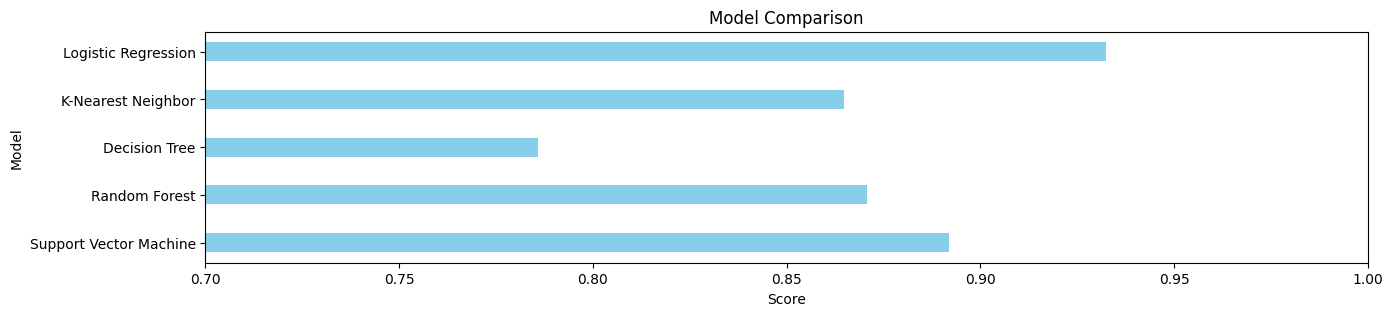

In [651]:
model_results = {
    'Logistic Regression': logreg_avg_test_score,
    'K-Nearest Neighbor': knn_avg_test_score,
    'Decision Tree': dt_avg_test_score,
    'Random Forest': rf_avg_test_score,
    'Support Vector Machine': svm_avg_test_score
}

model_names = list(model_results.keys())
model_scores = list(model_results.values())
num_models = len(model_names)
y_positions = np.arange(num_models)

bar_height = 0.4

print(model_results)
# Plotting the horizontal bar chart
plt.figure(figsize=(15, 3))
plt.barh(y_positions, model_scores, color='skyblue', height=bar_height)
plt.yticks(y_positions, model_names)
plt.xlabel('Score')
plt.ylabel('Model')
plt.title('Model Comparison')
plt.xlim(0.7, 1)  # start x-axis at 0.7 to make the difference more visible
plt.gca().invert_yaxis() # inverting to match the order of this notebook
plt.show()

## 5. Conclusion

The `Logistic Regression` model is by far the best performing model with a score of `93.24%` on the testing data. The worst model is the `Decision Tree` with a score of `78.59%`. The `K-Nearest Neigbor` and `Random Forest` models are comparable in performance, both scoring around `87%`, while the `Support Vector Machine` performs a little better than the former two with a score of `89.19%`. 